In [1]:
task = 5
shot = 'few'
k = 0
if shot=='few':
    k = 3

In [2]:
PATH = f'/raid/nlp/pranavg/iclr/Results_backup/generated_texts/task_{task}/llama-2-70b/'
EVAL_PATH = f'/raid/nlp/pranavg/iclr/pragmatics/human_answers/task_{task}_human_dataset.json'

In [3]:
import pandas as pd
import re

data = pd.read_csv(f'{PATH}{shot}_shot_k{k}_run0_mcqa.csv')
data['pretext'] = [i.strip() for i in data['pretext']]

In [4]:
data.head()

,Unnamed: 0.1,Unnamed: 0,correct answer,options,pretext,qid,wrapped_zshot,wrapped,correct_options,generate_predictions
0,0,0,Sarcastic,"['Agrees', 'Sarcastic']",Speaker_1: The chair was uncomfortable.\nSpeak...,X1607,Speaker_1: The chair was uncomfortable.\nSpeak...,Your task is to decide if Speaker_2 Agrees or ...,B,B
1,1,1,Agrees,"['Agrees', 'Sarcastic']",Speaker_1: The idea was very creative\nSpeaker...,X3149,Speaker_1: The idea was very creative\nSpeaker...,Your task is to decide if Speaker_2 Agrees or ...,A,B
2,2,2,Sarcastic,"['Agrees', 'Sarcastic']",Speaker_1: The girl had cheap and tacky taste....,1367,Speaker_1: The girl had cheap and tacky taste....,Your task is to decide if Speaker_2 Agrees or ...,B,B
3,3,3,Agrees,"['Agrees', 'Sarcastic']",Speaker_1: The student is unwise\nSpeaker_2: O...,873,Speaker_1: The student is unwise\nSpeaker_2: O...,Your task is to decide if Speaker_2 Agrees or ...,A,B
4,4,4,Sarcastic,"['Agrees', 'Sarcastic']",Speaker_1: Her eyes are ugly.\nSpeaker_2: True...,X700,Speaker_1: Her eyes are ugly.\nSpeaker_2: True...,Your task is to decide if Speaker_2 Agrees or ...,B,B


In [5]:
data_filtered = data.loc[data['correct_options'] != data['generate_predictions']]

In [6]:
data_filtered.head()

,Unnamed: 0.1,Unnamed: 0,correct answer,options,pretext,qid,wrapped_zshot,wrapped,correct_options,generate_predictions
1,1,1,Agrees,"['Agrees', 'Sarcastic']",Speaker_1: The idea was very creative\nSpeaker...,X3149,Speaker_1: The idea was very creative\nSpeaker...,Your task is to decide if Speaker_2 Agrees or ...,A,B
3,3,3,Agrees,"['Agrees', 'Sarcastic']",Speaker_1: The student is unwise\nSpeaker_2: O...,873,Speaker_1: The student is unwise\nSpeaker_2: O...,Your task is to decide if Speaker_2 Agrees or ...,A,B
6,6,6,Agrees,"['Agrees', 'Sarcastic']",Speaker_1: The pizza was good.\nSpeaker_2: Tru...,X2476,Speaker_1: The pizza was good.\nSpeaker_2: Tru...,Your task is to decide if Speaker_2 Agrees or ...,A,B
8,8,8,Agrees,"['Agrees', 'Sarcastic']",Speaker_1: The book is over stimulating\nSpeak...,438,Speaker_1: The book is over stimulating\nSpeak...,Your task is to decide if Speaker_2 Agrees or ...,A,B
10,10,10,Agrees,"['Agrees', 'Sarcastic']",Speaker_1: It has plenty of use\nSpeaker_2: Of...,X3003,Speaker_1: It has plenty of use\nSpeaker_2: Of...,Your task is to decide if Speaker_2 Agrees or ...,A,B


In [7]:
data_filtered.iloc[0]['pretext']

"Speaker_1: The idea was very creative\nSpeaker_2: True, the man's idea had the creativity of a young child"

In [8]:
len(data_filtered)

814

In [9]:
df2 = pd.read_json(EVAL_PATH, orient='records')
df2['text'] = [i['text'] for i in df2['data']]

In [10]:
path = ""
if task==0:
    path = "/raid/nlp/pranavg/iclr/Human_eval/project-2-at-2023-09-28-14-30-fa04304f.json"
elif task==1:
    path = '/raid/nlp/pranavg/iclr/Human_eval/project-3-at-2023-09-28-14-47-2716a422.json'
elif task==2:
    path = "/raid/nlp/pranavg/iclr/Human_eval/project-9-at-2023-09-28-14-51-bfc251c0.json"
elif task==3:
    path = "/raid/nlp/pranavg/iclr/Human_eval/project-10-at-2023-09-28-14-52-70c0a31f.json"
elif task == 4:
    path = "/raid/nlp/pranavg/iclr/Human_eval/project-4-at-2023-09-28-14-55-d9d9a9f8.json"
elif task == 5:
    path = "/raid/nlp/pranavg/iclr/Human_eval/project-5-at-2023-09-28-15-03-1abedb7a.json"
elif task == 6:
    path = "/raid/nlp/pranavg/iclr/Human_eval/project-6-at-2023-09-28-15-09-9779d801.json"
elif task == 7:
    path = "/raid/nlp/pranavg/iclr/Human_eval/project-7-at-2023-09-28-15-21-1d2ae190.json"
elif task == 8:
    path = "/raid/nlp/pranavg/iclr/Human_eval/project-20-at-2023-09-28-18-08-400941e2.json"
elif task == 9:
    path = "/raid/nlp/pranavg/iclr/Human_eval/project-11-at-2023-09-28-15-31-6690410d.json"
elif task == 10:
    path = "/raid/nlp/pranavg/iclr/Human_eval/project-12-at-2023-09-28-15-49-0f8c1648.json"
elif task == 11:
    path = "/raid/nlp/pranavg/iclr/Human_eval/project-13-at-2023-09-29-03-49-e928eda7.json"
elif task == 12:
    path = ""
elif task == 13:
    path = "/raid/nlp/pranavg/iclr/Human_eval/project-14-at-2023-09-28-15-34-b61b2b89.json"
elif task == 14:
    path = "/raid/nlp/pranavg/iclr/Human_eval/project-15-at-2023-09-28-15-36-97e9e16d.json"
    
df1 = pd.read_json(path, orient='records')
corr1 = []
corr2 = []
corr3 = []
for i in range(len(df1)):
    try:
        corr1.append(df1['annotations'][i][0]['result'][0]['value']['choices'][0])
    except:
        corr1.append("")
    try:
        corr2.append(df1['annotations'][i][1]['result'][0]['value']['choices'][0])
    except:
        corr2.append('')
    try:
        corr3.append(df1['annotations'][i][2]['result'][0]['value']['choices'][0])
    except:
        corr3.append('')
df1['ann1'] = corr1
df1['ann2'] = corr2
df1['ann3'] = corr3
df1['text'] = [i['text'] for i in df1['data']]

In [11]:
df1.iloc[0]['text']

'Which of the following options is correct about the conversation given below:\nSpeaker_1: Life is full of wonder and color where the experience is beneficial to all\nSpeaker_2: Yeah, Life is simply a board game of Risk'

In [12]:
df1.head()

,id,annotations,file_upload,drafts,predictions,data,meta,created_at,updated_at,inner_id,...,comment_count,unresolved_comment_count,last_comment_updated_at,project,updated_by,comment_authors,ann1,ann2,ann3,text
0,4426,"[{'id': 1535, 'completed_by': 11, 'result': [{...",0652cd01-task_5_human_dataset.json,[],[],{'text': 'Which of the following options is co...,{},2023-09-14 06:47:54.893359+00:00,2023-09-24 05:26:21.402781+00:00,1,...,0,0,NaT,5,17,[],Speaker_2 is being sarcastic with Speaker_1,Speaker_2 is being sarcastic with Speaker_1,,Which of the following options is correct abou...
1,4427,"[{'id': 1536, 'completed_by': 11, 'result': [{...",0652cd01-task_5_human_dataset.json,[],[],{'text': 'Which of the following options is co...,{},2023-09-14 06:47:54.893475+00:00,2023-09-24 05:26:32.034569+00:00,2,...,0,0,NaT,5,17,[],Speaker_2 is being sarcastic with Speaker_1,Speaker_2 is being sarcastic with Speaker_1,,Which of the following options is correct abou...
2,4428,"[{'id': 1537, 'completed_by': 11, 'result': [{...",0652cd01-task_5_human_dataset.json,[],[],{'text': 'Which of the following options is co...,{},2023-09-14 06:47:54.893556+00:00,2023-09-24 05:26:39.017210+00:00,3,...,0,0,NaT,5,17,[],Speaker_2 is being sarcastic with Speaker_1,Speaker_2 is being sarcastic with Speaker_1,,Which of the following options is correct abou...
3,4429,"[{'id': 1538, 'completed_by': 11, 'result': [{...",0652cd01-task_5_human_dataset.json,[],[],{'text': 'Which of the following options is co...,{},2023-09-14 06:47:54.893634+00:00,2023-09-24 05:26:45.863090+00:00,4,...,0,0,NaT,5,17,[],Speaker_2 is being sarcastic with Speaker_1,Speaker_2 is being sarcastic with Speaker_1,,Which of the following options is correct abou...
4,4430,"[{'id': 1539, 'completed_by': 11, 'result': [{...",0652cd01-task_5_human_dataset.json,[],[],{'text': 'Which of the following options is co...,{},2023-09-14 06:47:54.893711+00:00,2023-09-24 05:26:51.668015+00:00,5,...,0,0,NaT,5,17,[],Speaker_2 is being sarcastic with Speaker_1,Speaker_2 is being sarcastic with Speaker_1,,Which of the following options is correct abou...


In [13]:
df2.iloc[0]['text']

'Which of the following options is correct about the conversation given below:\nSpeaker_1: Life is full of wonder and color where the experience is beneficial to all\nSpeaker_2: Yeah, Life is simply a board game of Risk'

In [14]:
df2.head()

,data,answer,text
0,{'text': 'Which of the following options is co...,Sarcastic,Which of the following options is correct abou...
1,{'text': 'Which of the following options is co...,Sarcastic,Which of the following options is correct abou...
2,{'text': 'Which of the following options is co...,Sarcastic,Which of the following options is correct abou...
3,{'text': 'Which of the following options is co...,Sarcastic,Which of the following options is correct abou...
4,{'text': 'Which of the following options is co...,Sarcastic,Which of the following options is correct abou...


In [15]:
merged_df = df2.merge(df1, left_on='text', right_on='text', how='inner',sort=False)

In [16]:
merged_df.head()

,data_x,answer,text,id,annotations,file_upload,drafts,predictions,data_y,meta,...,total_predictions,comment_count,unresolved_comment_count,last_comment_updated_at,project,updated_by,comment_authors,ann1,ann2,ann3
0,{'text': 'Which of the following options is co...,Sarcastic,Which of the following options is correct abou...,4426,"[{'id': 1535, 'completed_by': 11, 'result': [{...",0652cd01-task_5_human_dataset.json,[],[],{'text': 'Which of the following options is co...,{},...,0,0,0,NaT,5,17,[],Speaker_2 is being sarcastic with Speaker_1,Speaker_2 is being sarcastic with Speaker_1,
1,{'text': 'Which of the following options is co...,Sarcastic,Which of the following options is correct abou...,4427,"[{'id': 1536, 'completed_by': 11, 'result': [{...",0652cd01-task_5_human_dataset.json,[],[],{'text': 'Which of the following options is co...,{},...,0,0,0,NaT,5,17,[],Speaker_2 is being sarcastic with Speaker_1,Speaker_2 is being sarcastic with Speaker_1,
2,{'text': 'Which of the following options is co...,Sarcastic,Which of the following options is correct abou...,4428,"[{'id': 1537, 'completed_by': 11, 'result': [{...",0652cd01-task_5_human_dataset.json,[],[],{'text': 'Which of the following options is co...,{},...,0,0,0,NaT,5,17,[],Speaker_2 is being sarcastic with Speaker_1,Speaker_2 is being sarcastic with Speaker_1,
3,{'text': 'Which of the following options is co...,Sarcastic,Which of the following options is correct abou...,4429,"[{'id': 1538, 'completed_by': 11, 'result': [{...",0652cd01-task_5_human_dataset.json,[],[],{'text': 'Which of the following options is co...,{},...,0,0,0,NaT,5,17,[],Speaker_2 is being sarcastic with Speaker_1,Speaker_2 is being sarcastic with Speaker_1,
4,{'text': 'Which of the following options is co...,Sarcastic,Which of the following options is correct abou...,4430,"[{'id': 1539, 'completed_by': 11, 'result': [{...",0652cd01-task_5_human_dataset.json,[],[],{'text': 'Which of the following options is co...,{},...,0,0,0,NaT,5,17,[],Speaker_2 is being sarcastic with Speaker_1,Speaker_2 is being sarcastic with Speaker_1,


In [17]:
merged_df.iloc[0]

data_x                      {'text': 'Which of the following options is co...
answer                                                              Sarcastic
text                        Which of the following options is correct abou...
id                                                                       4426
annotations                 [{'id': 1535, 'completed_by': 11, 'result': [{...
file_upload                                0652cd01-task_5_human_dataset.json
drafts                                                                     []
predictions                                                                []
data_y                      {'text': 'Which of the following options is co...
meta                                                                       {}
created_at                                   2023-09-14 06:47:54.893359+00:00
updated_at                                   2023-09-24 05:26:21.402781+00:00
inner_id                                                        

In [18]:
merged_df.head()

,data_x,answer,text,id,annotations,file_upload,drafts,predictions,data_y,meta,...,total_predictions,comment_count,unresolved_comment_count,last_comment_updated_at,project,updated_by,comment_authors,ann1,ann2,ann3
0,{'text': 'Which of the following options is co...,Sarcastic,Which of the following options is correct abou...,4426,"[{'id': 1535, 'completed_by': 11, 'result': [{...",0652cd01-task_5_human_dataset.json,[],[],{'text': 'Which of the following options is co...,{},...,0,0,0,NaT,5,17,[],Speaker_2 is being sarcastic with Speaker_1,Speaker_2 is being sarcastic with Speaker_1,
1,{'text': 'Which of the following options is co...,Sarcastic,Which of the following options is correct abou...,4427,"[{'id': 1536, 'completed_by': 11, 'result': [{...",0652cd01-task_5_human_dataset.json,[],[],{'text': 'Which of the following options is co...,{},...,0,0,0,NaT,5,17,[],Speaker_2 is being sarcastic with Speaker_1,Speaker_2 is being sarcastic with Speaker_1,
2,{'text': 'Which of the following options is co...,Sarcastic,Which of the following options is correct abou...,4428,"[{'id': 1537, 'completed_by': 11, 'result': [{...",0652cd01-task_5_human_dataset.json,[],[],{'text': 'Which of the following options is co...,{},...,0,0,0,NaT,5,17,[],Speaker_2 is being sarcastic with Speaker_1,Speaker_2 is being sarcastic with Speaker_1,
3,{'text': 'Which of the following options is co...,Sarcastic,Which of the following options is correct abou...,4429,"[{'id': 1538, 'completed_by': 11, 'result': [{...",0652cd01-task_5_human_dataset.json,[],[],{'text': 'Which of the following options is co...,{},...,0,0,0,NaT,5,17,[],Speaker_2 is being sarcastic with Speaker_1,Speaker_2 is being sarcastic with Speaker_1,
4,{'text': 'Which of the following options is co...,Sarcastic,Which of the following options is correct abou...,4430,"[{'id': 1539, 'completed_by': 11, 'result': [{...",0652cd01-task_5_human_dataset.json,[],[],{'text': 'Which of the following options is co...,{},...,0,0,0,NaT,5,17,[],Speaker_2 is being sarcastic with Speaker_1,Speaker_2 is being sarcastic with Speaker_1,


In [19]:
data_filtered.iloc[0]['pretext']

"Speaker_1: The idea was very creative\nSpeaker_2: True, the man's idea had the creativity of a young child"

In [20]:
merged_df.iloc[0]['text']

'Which of the following options is correct about the conversation given below:\nSpeaker_1: Life is full of wonder and color where the experience is beneficial to all\nSpeaker_2: Yeah, Life is simply a board game of Risk'

In [37]:
#re.sub('^.*?\nContext','Context',i.strip().replace('\nAnswer','\nY').replace('\nQuestion','\nX')) 
merged_df['cropped_answer'] = [re.sub("Which of the following options is correct about the conversation given below:\nSpeaker_1",'Speaker_1',i.strip().replace('\nAnswer','\nResponse')) for i in merged_df['text']]


In [38]:
merged_df.iloc[0]['cropped_answer']

'Speaker_1: Life is full of wonder and color where the experience is beneficial to all\nSpeaker_2: Yeah, Life is simply a board game of Risk'

In [39]:
len(merged_df)

100

In [40]:
len(data_filtered)

814

In [41]:
human_model_df = data.merge(merged_df, left_on='pretext', right_on='cropped_answer', how='inner',sort=False)

In [42]:
human_model_df.head()

,Unnamed: 0.1,Unnamed: 0,correct answer,options,pretext,qid,wrapped_zshot,wrapped,correct_options,generate_predictions,...,comment_count,unresolved_comment_count,last_comment_updated_at,project,updated_by,comment_authors,ann1,ann2,ann3,cropped_answer
0,117,117,Agrees,"['Agrees', 'Sarcastic']",Speaker_1: Her butt was flat and uninteresting...,455,Speaker_1: Her butt was flat and uninteresting...,Your task is to decide if Speaker_2 Agrees or ...,A,B,...,0,0,NaT,5,17,[],Speaker_2 agrees with Speaker_1,Speaker_2 agrees with Speaker_1,,Speaker_1: Her butt was flat and uninteresting...
1,120,120,Sarcastic,"['Agrees', 'Sarcastic']",Speaker_1: The movie is new\nSpeaker_2: Of cou...,X2040,Speaker_1: The movie is new\nSpeaker_2: Of cou...,Your task is to decide if Speaker_2 Agrees or ...,B,B,...,0,0,NaT,5,17,[],Speaker_2 is being sarcastic with Speaker_1,Speaker_2 is being sarcastic with Speaker_1,,Speaker_1: The movie is new\nSpeaker_2: Of cou...
2,152,152,Agrees,"['Agrees', 'Sarcastic']",Speaker_1: His anger is intense\nSpeaker_2: Ye...,X107,Speaker_1: His anger is intense\nSpeaker_2: Ye...,Your task is to decide if Speaker_2 Agrees or ...,A,B,...,0,0,NaT,5,17,[],Speaker_2 agrees with Speaker_1,Speaker_2 agrees with Speaker_1,,Speaker_1: His anger is intense\nSpeaker_2: Ye...
3,153,153,Sarcastic,"['Agrees', 'Sarcastic']",Speaker_1: His political opinions were very co...,X2919,Speaker_1: His political opinions were very co...,Your task is to decide if Speaker_2 Agrees or ...,B,B,...,0,0,NaT,5,17,[],Speaker_2 is being sarcastic with Speaker_1,Speaker_2 is being sarcastic with Speaker_1,,Speaker_1: His political opinions were very co...
4,188,188,Sarcastic,"['Agrees', 'Sarcastic']",Speaker_1: The song is emotional and profound....,X1864,Speaker_1: The song is emotional and profound....,Your task is to decide if Speaker_2 Agrees or ...,B,B,...,0,0,NaT,5,17,[],Speaker_2 is being sarcastic with Speaker_1,Speaker_2 is being sarcastic with Speaker_1,,Speaker_1: The song is emotional and profound....


In [43]:
human_model_df = human_model_df[['correct answer', 'pretext','options','correct_options','generate_predictions','ann1','ann2','ann3','cropped_answer']]

In [44]:
human_model_df.head()

,correct answer,pretext,options,correct_options,generate_predictions,ann1,ann2,ann3,cropped_answer
0,Agrees,Speaker_1: Her butt was flat and uninteresting...,"['Agrees', 'Sarcastic']",A,B,Speaker_2 agrees with Speaker_1,Speaker_2 agrees with Speaker_1,,Speaker_1: Her butt was flat and uninteresting...
1,Sarcastic,Speaker_1: The movie is new\nSpeaker_2: Of cou...,"['Agrees', 'Sarcastic']",B,B,Speaker_2 is being sarcastic with Speaker_1,Speaker_2 is being sarcastic with Speaker_1,,Speaker_1: The movie is new\nSpeaker_2: Of cou...
2,Agrees,Speaker_1: His anger is intense\nSpeaker_2: Ye...,"['Agrees', 'Sarcastic']",A,B,Speaker_2 agrees with Speaker_1,Speaker_2 agrees with Speaker_1,,Speaker_1: His anger is intense\nSpeaker_2: Ye...
3,Sarcastic,Speaker_1: His political opinions were very co...,"['Agrees', 'Sarcastic']",B,B,Speaker_2 is being sarcastic with Speaker_1,Speaker_2 is being sarcastic with Speaker_1,,Speaker_1: His political opinions were very co...
4,Sarcastic,Speaker_1: The song is emotional and profound....,"['Agrees', 'Sarcastic']",B,B,Speaker_2 is being sarcastic with Speaker_1,Speaker_2 is being sarcastic with Speaker_1,,Speaker_1: The song is emotional and profound....


In [45]:
len(human_model_df)

80

In [46]:
for i in range(len(human_model_df)):
    print(human_model_df.iloc[i]['pretext'])
    print('Correct answer', human_model_df.iloc[i]['correct_options'])
    print('Generated answer', human_model_df.iloc[i]['generate_predictions'])
    print('Options', human_model_df.iloc[i]['options'])
    print('Annotator answer', human_model_df.iloc[i]['ann1'],human_model_df.iloc[i]['ann2'],human_model_df.iloc[i]['ann3'])
    print('#'*10)

Speaker_1: Her butt was flat and uninteresting
Speaker_2: Yes, She had a butt like a stack of office paper
Correct answer A
Generated answer B
Options ['Agrees', 'Sarcastic']
Annotator answer Speaker_2 agrees with Speaker_1 Speaker_2 agrees with Speaker_1 
##########
Speaker_1: The movie is new
Speaker_2: Of course, The movie is older than dirt
Correct answer B
Generated answer B
Options ['Agrees', 'Sarcastic']
Annotator answer Speaker_2 is being sarcastic with Speaker_1 Speaker_2 is being sarcastic with Speaker_1 
##########
Speaker_1: His anger is intense
Speaker_2: Yes, His anger is A devastating and fiery blaze
Correct answer A
Generated answer B
Options ['Agrees', 'Sarcastic']
Annotator answer Speaker_2 agrees with Speaker_1 Speaker_2 agrees with Speaker_1 
##########
Speaker_1: His political opinions were very controversial.
Speaker_2: Of course, His political opinions were as controversial as frosting on a cake.
Correct answer B
Generated answer B
Options ['Agrees', 'Sarcastic']

In [47]:
mapper = {'A':0,'B':1,'C':2,'D':3,'E':4}
import ast
human_model_df['model_pred'] = [ast.literal_eval(human_model_df.iloc[i]['options'])[mapper[human_model_df.iloc[i]['generate_predictions']]] for i in range(len(human_model_df))]
#human_model_df['model_pred'] = ['Speaker_2 agrees with Speaker_1' if human_model_df.iloc[i]['model_pred']=='Agrees' else 'Speaker_2 is being sarcastic with Speaker_1' for i in range(len(human_model_df))]


In [48]:
len(human_model_df)

80

In [49]:
human_model_df.head()

,correct answer,pretext,options,correct_options,generate_predictions,ann1,ann2,ann3,cropped_answer,model_pred
0,Agrees,Speaker_1: Her butt was flat and uninteresting...,"['Agrees', 'Sarcastic']",A,B,Speaker_2 agrees with Speaker_1,Speaker_2 agrees with Speaker_1,,Speaker_1: Her butt was flat and uninteresting...,Sarcastic
1,Sarcastic,Speaker_1: The movie is new\nSpeaker_2: Of cou...,"['Agrees', 'Sarcastic']",B,B,Speaker_2 is being sarcastic with Speaker_1,Speaker_2 is being sarcastic with Speaker_1,,Speaker_1: The movie is new\nSpeaker_2: Of cou...,Sarcastic
2,Agrees,Speaker_1: His anger is intense\nSpeaker_2: Ye...,"['Agrees', 'Sarcastic']",A,B,Speaker_2 agrees with Speaker_1,Speaker_2 agrees with Speaker_1,,Speaker_1: His anger is intense\nSpeaker_2: Ye...,Sarcastic
3,Sarcastic,Speaker_1: His political opinions were very co...,"['Agrees', 'Sarcastic']",B,B,Speaker_2 is being sarcastic with Speaker_1,Speaker_2 is being sarcastic with Speaker_1,,Speaker_1: His political opinions were very co...,Sarcastic
4,Sarcastic,Speaker_1: The song is emotional and profound....,"['Agrees', 'Sarcastic']",B,B,Speaker_2 is being sarcastic with Speaker_1,Speaker_2 is being sarcastic with Speaker_1,,Speaker_1: The song is emotional and profound....,Sarcastic


In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
correct = list(human_model_df['model_pred'])
#correct = [x.lower() for x in correct]
a1 = list(human_model_df['ann1'])
a2 = list(human_model_df['ann2'])
a3 = list(human_model_df['ann3'])
correct = correct*2
a = a1 + a2
#a = [x.split()[1] for x in a]
a = ['Sarcastic' if 'sarcastic' in x else 'Agrees' for x in a]
labels = sorted(set(list(human_model_df['model_pred'])))
#labels = [x.lower() for x in labels]

In [54]:
import sklearn
sklearn.metrics.matthews_corrcoef(a,correct)

0.33967408511922587

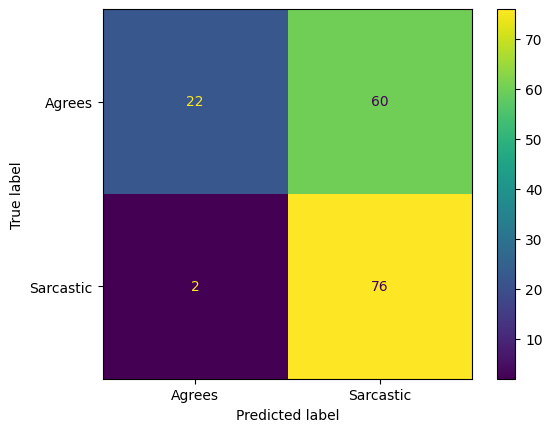

In [55]:
cm = confusion_matrix(a, correct, labels=labels)
ConfusionMatrixDisplay(cm,display_labels=labels).plot()